In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

In [2]:
url="https://data.montreal.ca/dataset/9797a946-9da8-41ec-8815-f6b276dec7e9/resource/e18bfd07-edc8-4ce8-8a5a-3b617662a794/download/limites-administratives-agglomeration.geojson"
gdf = gpd.read_file(url)

In [3]:
gdf.columns = gdf.columns.str.lower()

<Axes: >

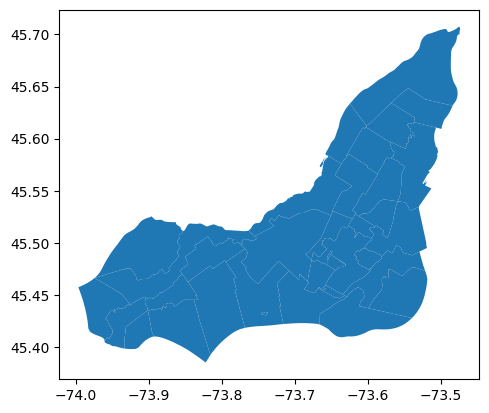

In [4]:
gdf.geometry.plot()

In [25]:
polygons = gdf.copy()

# Create an empty adjacency matrix
n = len(polygons)
adj_matrix = np.empty((n, n), dtype='object')
adj_matrix[:] = ''

# Loop through each polygon and find its neighbors
for i in range(n):
    for j in range(n):
        if i != j:
            if polygons.geometry[i].touches(polygons.geometry[j]):
                adj_matrix[i][j] = polygons.iloc[j]['abrev']

print(adj_matrix)


[['' '' '' ... '' '' '']
 ['' '' '' ... 'DV' '' '']
 ['' '' '' ... '' '' '']
 ...
 ['' 'PC' '' ... '' 'LR' '']
 ['' '' '' ... 'DV' '' '']
 ['' '' '' ... '' '' '']]


In [38]:
# polygons = gdf.copy()

# # Create an empty adjacency matrix
# n = len(polygons)
# adj_matrix = np.zeros((n, n))

# # Loop through each polygon and find its neighbors
# for i in range(n):
#     for j in range(n):
#         if i != j:
#             if polygons.geometry[i].touches(polygons.geometry[j]):
#                 adj_matrix[i][j] = 1
                
# print(adj_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
polygons = gdf.copy()

# Create an empty adjacency matrix
n = len(polygons)
adj_matrix = np.zeros((n, n))

# Loop through each polygon and find its neighbors
for i in range(n):
    for j in range(n):
        if i != j:
            if polygons.geometry[i].touches(polygons.geometry[j]):
                adj_matrix[i][j] = j
                
print(adj_matrix)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 31.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  1.  0. ...  0. 32.  0.]
 [ 0.  0.  0. ... 31.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [62]:
adj_matrix[0]
# # 6(MH), 9(RP), 14(ME), 23(MN), 27(LN)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  9.,  0.,  0.,  0.,
        0., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
        0., 27.,  0.,  0.,  0.,  0.,  0.,  0.])

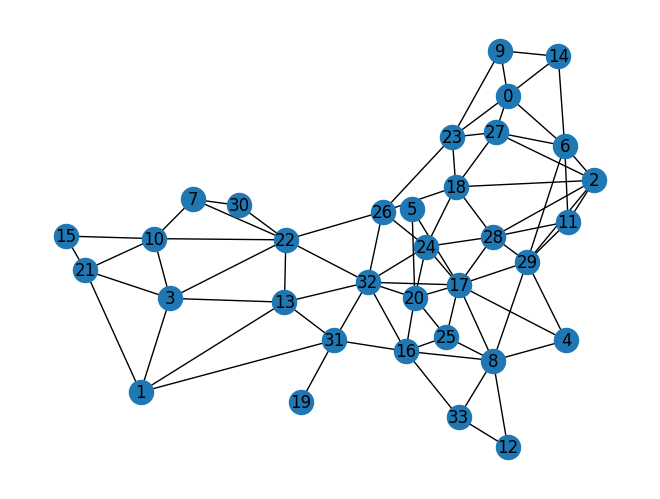

In [55]:
import networkx as nx

G = nx.Graph(np.array(adj_matrix)) 
nx.draw(G, with_labels=True)
plt.show()

In [57]:
node_labels = {i: polygons.iloc[i]['abrev'] for i in range(n)}
node_labels

{0: 'AJ',
 1: 'PC',
 2: 'RO',
 3: 'KL',
 4: 'WM',
 5: 'HS',
 6: 'MH',
 7: 'SV',
 8: 'SO',
 9: 'RP',
 10: 'BV',
 11: 'PM',
 12: 'VD',
 13: 'DO',
 14: 'ME',
 15: 'BU',
 16: 'LC',
 17: 'CN',
 18: 'VS',
 19: 'ID',
 20: 'CL',
 21: 'BF',
 22: 'PR',
 23: 'MN',
 24: 'MR',
 25: 'MO',
 26: 'AC',
 27: 'LN',
 28: 'OM',
 29: 'VM',
 30: 'IS',
 31: 'DV',
 32: 'LR',
 33: 'LS'}

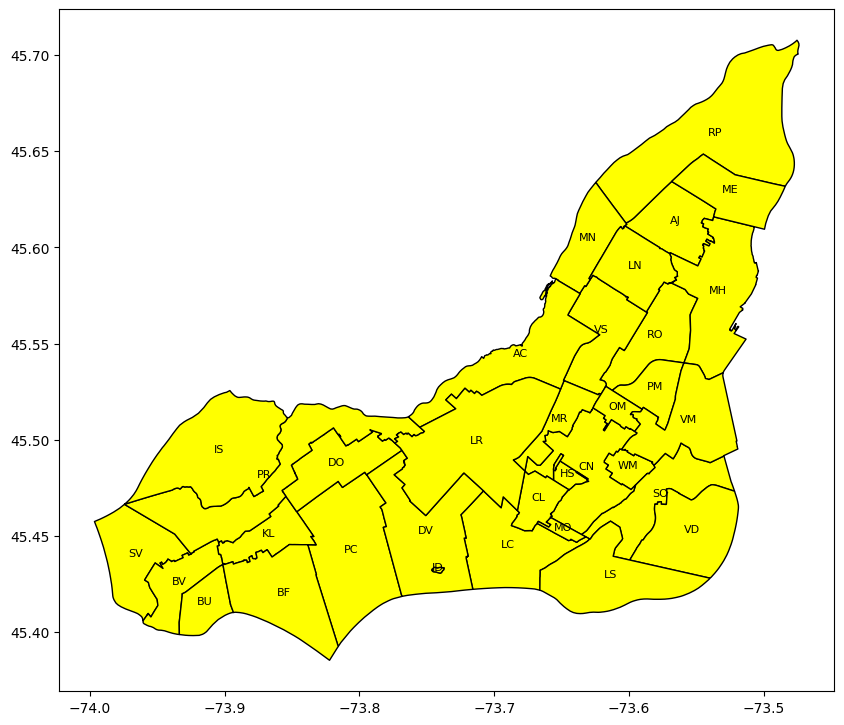

In [58]:
fig, ax = plt.subplots(figsize = (10,10))
ax = gdf.plot(ax=ax, color='yellow', edgecolor='black')

gdf.apply(
    lambda x: ax.annotate(
        text=x['abrev'], 
        xy=x.geometry.centroid.coords[0], 
        ha='center', 
        fontsize=8), 
    axis=1);

In [40]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create a graph from the adjacency matrix
# G = nx.DiGraph(adj_matrix)
# nx.set_node_attributes(G, node_labels, 'name')

# # Draw the graph
# pos = nx.circular_layout(G)
# nx.draw(G, pos, with_labels=True)
# node_labels = nx.get_node_attributes(G, 'name')
# nx.draw_networkx_labels(G, pos, labels=node_labels)
# plt.show()